# Analiza zbioru Accidental Drug Related Deaths 2012-2018

## Import bibliotek

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS


plt.style.use('fivethirtyeight')

## Eksplorujemy dataset w celu sprawdzenia przypadków śmiertelnych przedawkowania substancji nielegalnych w stanie Connecticut
Przyjrzymy się dziś problemowi przedawkowań nielegalnych substancji, leków oraz alkoholu, jest to niestety bardzo poważny problem z którym trzeba walczyć.
Zbiór znaleziony na https://www.kaggle.com/muhakabartay/accidental-drug-related-deaths-20122018

In [2]:
df=pd.read_csv('data.csv')
df = df.drop(columns=['Unnamed: 0'])

Zbiór załadowany

In [3]:
print('Liczba przypadków śmiertelnych w stanie Connecticut:',df.shape[0])

Liczba przypadków śmiertelnych w stanie Connecticut: 5105


In [4]:
print("Kolumny do opisania osoby", df.columns)



Kolumny do opisania osoby Index(['ID', 'Date', 'Age', 'Sex', 'Race', 'ResidenceCity', 'ResidenceCounty',
       'ResidenceState', 'DeathCity', 'DeathCounty', 'Location',
       'LocationifOther', 'DescriptionofInjury', 'InjuryPlace', 'InjuryCity',
       'InjuryCounty', 'InjuryState', 'COD', 'OtherSignifican', 'Heroin',
       'Cocaine', 'Fentanyl', 'FentanylAnalogue', 'Oxycodone', 'Oxymorphone',
       'Ethanol', 'Hydrocodone', 'Benzodiazepine', 'Methadone', 'Amphet',
       'Tramad', 'Morphine_NotHeroin', 'Hydromorphone', 'Other', 'OpiateNOS',
       'AnyOpioid', 'MannerofDeath'],
      dtype='object')


## Analiza metryk ofiar niebezpiecznych substancji

,Age
count,5102.000000
mean,41.964916
std,12.336639
min,14.000000
25%,32.000000
50%,42.000000
75%,52.000000
max,87.000000


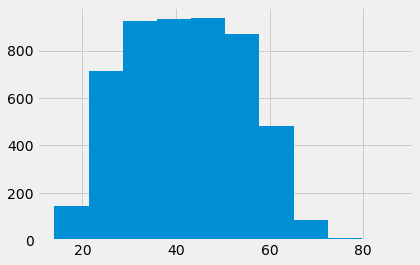

In [5]:
df['Age'].hist()
df.describe()

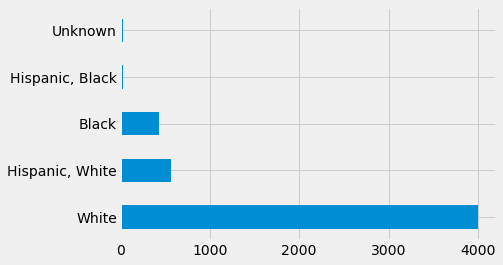

In [6]:
df['Race'].value_counts()[:5].plot.barh(width=0.5)
plt.show()

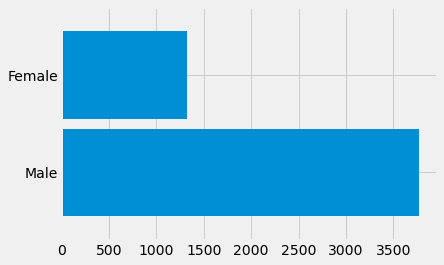

In [7]:
df['Sex'].value_counts()[:2].plot.barh(width=0.9)
plt.show()

Najczęściej jest to biały mężczyzna w wieku pomiędzy 30 a 50 lat.
Niektóre z tych różnic między płciami być może dałoby się wytłumaczyć wyższymi poziomami ryzykownych zachowań wśród mężczyzn, w tym wcześniejszą inicjacją w zażywaniu, używaniem wielu narkotyków jednocześnie i alkoholu, wstrzykiwaniem 
w samotności oraz wyższym odsetkiem pobytu w więzieniach. 
Rozkład przedstawicieli danych ras pokrywa się z oficjalna demografią stanu.

## W dalszych krokach przyjrzymy się zależności między miejscem zamieszkania, wypadku i śmierci osoby która zmarłą z powodu narkotyków

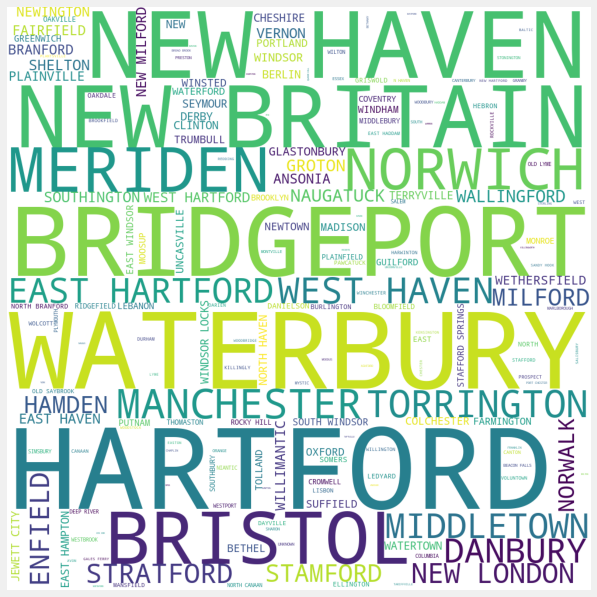

In [8]:
wc = WordCloud(background_color="white", max_words=1000, 
               stopwords=STOPWORDS,width=1000,height=1000)
wc.generate(" ".join(df['ResidenceCity'].dropna()))
plt.imshow(wc)
plt.axis('off')
fig=plt.gcf()
fig.set_size_inches(10,10)
plt.show()

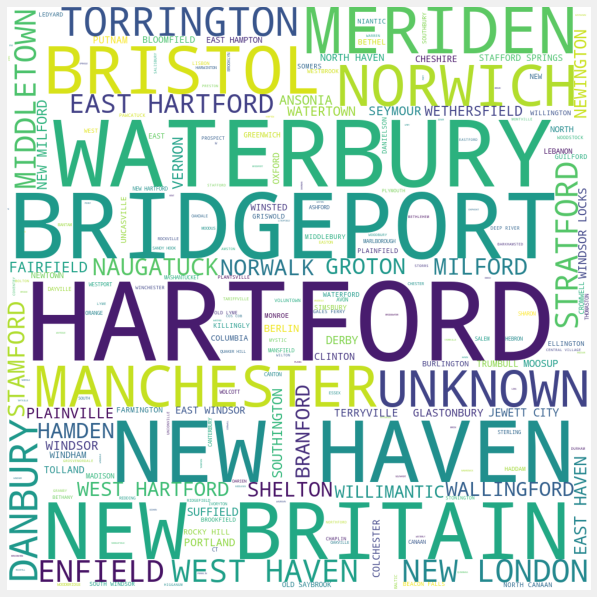

In [9]:
wc = WordCloud(background_color="white", max_words=1000, 
               stopwords=STOPWORDS,width=1000,height=1000)
wc.generate(" ".join(df['InjuryCity'].dropna()))
plt.imshow(wc)
plt.axis('off')
fig=plt.gcf()
fig.set_size_inches(10,10)
plt.show()

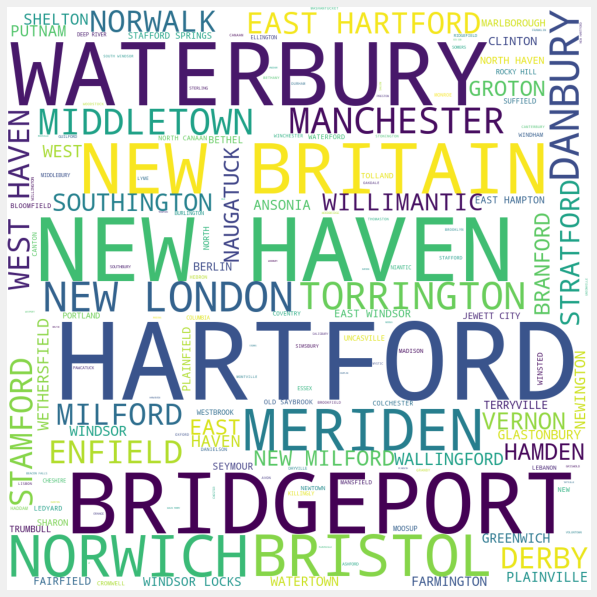

In [10]:
wc = WordCloud(background_color="white", max_words=1000, 
               stopwords=STOPWORDS,width=1000,height=1000)
wc.generate(" ".join(df['DeathCity'].dropna()))
plt.imshow(wc)
plt.axis('off')
fig=plt.gcf()
fig.set_size_inches(10,10)
plt.show()

### Jak widać większość miast się powtarza z podobnym rozmiarem, więc mozemy przyjąć że narkomani w stanie Connecticut są mało mobilni.

### W ramach eksperymentu sprawdzono ile osób zmarło po "mixie" najpopularniejszych używek.

In [11]:
osoba_wiele_narkotykow_na_raz = df[(df['Amphet'] == 'Y') & 
              (df['Benzodiazepine'] == 'Y')&
              (df['Cocaine'] == 'Y')&
              (df['Ethanol'] == 'Y')&
              (df['Heroin'] == 'Y')]
len(osoba_wiele_narkotykow_na_raz)

1

## Wnioski

Po przeanalizowaniu zbioru, można dojść do wniosku że na śmierć z powodu narkotyków najbardziej narażeni są biali mężczyzni w wieku 30-50 lat, mieszkający w największych miastach stanu.